## Abstact

This notebook is the entry point for the project. We want to put some input data, analyze it and look up the results.   

So the plan is:

0. Look for the input file
1. Create executable file from cpp sources
2. Create config file
3. Run executable file and get the output data
4. Read the output data
5. Look up the output data

Let's complete all the steps of this plan

## 0. Look for the input file

For this demonstation we will use the Pseudodata file from the description of the task (file **description/PseudoData.csv**)

## 1. Create executable file from cpp sources
First of all we need to create executable  file from cpp sources. Let's do it by the CMake commands, which we will run with **subprocess** library.

Cmake will create the executable file according to file CMakeLists.txt, which is name is **cpp_executable.exe**. This file will be located in the **cpp/src/build/Debug** folder 

*TODO: change the folder for the executable file*

In [117]:
import subprocess

# build cpp sources
cmake_build_command = "cmake -S. -Bbuild"
p = subprocess.Popen([*cmake_build_command.split()], cwd="../cpp/src")
return_code = p.wait()
if return_code == 0:
    print("building ok")

# create executable file
cmake_link_command = "cmake --build build"
p = subprocess.Popen([*cmake_link_command.split()], cwd="../cpp/src")
return_code = p.wait()
if return_code == 0:
    print("linking ok")

building ok
linking ok


## 2. Create config file

As shown in Readme file, we need to create config file in csv format, which have to contain fields **brand_factor,input_file_name,output_file_name,is_full_data**

Let's set some values for these fields and write them to the **config.txt** file, which we will put to the input of the cpp executable file.

In [118]:
brand_factor = 1.0
input_file_name = "../description/PseudoData.csv"
output_file_name = "output_data.txt"
is_full_data = 1

config_file_name = "config.txt"
with open(config_file_name, 'w') as f:
    config_str = f"{brand_factor},{input_file_name},{output_file_name},{is_full_data}\n"
    f.write(config_str)

## 3. Run executable file and get the output data

Now we can run the cpp executable file, which we got on step 1 with path to the config file, which we created on the previous step.

*TODO: output the error messages*

In [119]:
exe_path = '../cpp/src/build/Debug/cpp_executable.exe'
config_file_path = "config.txt"

p = subprocess.Popen([exe_path, config_file_path])
return_code = p.wait()
if return_code == 0:
    print("execution ok")

execution ok


## 4. Read the output data

If we succeeded on the previous steps, now we have the file **output_file_name**, which format is described in the Readme file: for all the age we have five rows with ids:

Breed_C ids

Breed_NC ids

Breed_C Lost ids

Breed_C Gained ids

Breed_C Regained ids

So let's get this data from the **output_file_name** file and look up it.

*TODO: check that file format is correct*

In [120]:
output_data = []

with open(output_file_name, "r") as output_file:
    lines = output_file.readlines()
    for line_number in range(0, len(lines), 5):
        breed_c_ids_list = [float(i) for i in lines[line_number].split(",") if i.strip()]
        breed_nc_ids_list = [float(i) for i in lines[line_number + 1].split(",") if i.strip()]
        breed_c_lost_ids_list = [float(i) for i in lines[line_number + 2].split(",") if i.strip()]
        breed_c_gained_ids_list = [float(i) for i in lines[line_number + 3].split(",") if i.strip()]
        breed_c_regained_ids_list = [float(i) for i in lines[line_number + 4].split(",") if i.strip()]
        output_data.append({
            "breed_c_ids": breed_c_ids_list,
            "breed_nc_ids": breed_nc_ids_list,
            "breed_c_lost_ids": breed_c_lost_ids_list,
            "breed_c_gained_ids": breed_c_gained_ids_list,
            "breed_c_regained_ids": breed_c_regained_ids_list,
        })

## 5. Look up the output data

Now we can analyze the output data. For example, let's see how change the count of the each of ids group through ages.

In [122]:
# init by empty lists
plot_data = {}
legend = []
for key in output_data[0]:
    plot_data[key] = []
    legend.append(key)

# get count
for output_data_unit in output_data:
    for key in output_data_unit:
        plot_data[key].append(len(output_data_unit[key]))
        
print(plot_data)

{'breed_c_ids': [5658, 3598, 5617, 3488, 5575, 3444, 5506, 3437, 5549, 3434, 5598, 3441, 5481, 3395, 5564], 'breed_nc_ids': [3179, 5239, 3220, 5349, 3262, 5393, 3331, 5400, 3288, 5403, 3239, 5396, 3356, 5442, 3273], 'breed_c_lost_ids': [1413, 394, 1134, 403, 1088, 415, 1060, 378, 1048, 397, 1038, 426, 1074, 402, 1021], 'breed_c_gained_ids': [3214, 258, 3023, 232, 3021, 228, 2969, 240, 2988, 247, 3001, 226, 2974, 239, 2974], 'breed_c_regained_ids': [0, 1041, 3198, 1150, 3326, 1209, 3309, 1254, 3378, 1245, 3395, 1249, 3334, 1291, 3403]}


Library *matplotlib* can help with the plot of the count of the breed_c_ids for each year.

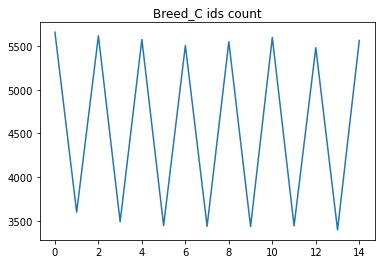

In [124]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ages_count = 15
x = np.arange(ages_count)

plt.plot(x, plot_data["breed_c_ids"])
plt.title ("Breed_C ids count")

plt.show()